In [1]:
from experiment import Experiment
%matplotlib inline

/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
var_dict = dict(
    numerical_vars = ['age', 'fnlwgt', 'education-num', 'hours-per-week',
                      'capital-gain' ,'capital-loss'],
    categorical_vars = ['workclass', 'education', 'marital-status', 'occupation', 
                        'relationship', 'race', 'sex', 'native-country'],
    class_var = 'class'
)

In [3]:
exp = Experiment('data/adult.csv', 
                 var_dict,
                 embedding_dim=32,
                 cv=5,
                 lr=0.1,
                 batch_size=1024,
                 n_epoch=100,
                 verbose=True,
                 n_bins_range=[3, 5, 7],
                 n_init_bins_list=[10, 15, 20],
                 co_occur_cutoff=2)

In [4]:
exp.data.shape

(48842, 15)

In [5]:
exp.perform_exp()

/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -


>>> Epoch = 1
Loss = 0.8873605132102966
[3, 4, 4, 3, 2, 2]
>>> Epoch = 2
Loss = 0.8757932186126709
[3, 3, 4, 3, 2, 2]
>>> Epoch = 3
Loss = 0.8492144346237183
[3, 4, 4, 3, 2, 2]
>>> Epoch = 4
Loss = 0.8019857406616211
[3, 3, 4, 3, 2, 2]
>>> Epoch = 5
Loss = 0.7682191133499146
[3, 3, 4, 3, 2, 2]
>>> Epoch = 6
Loss = 0.8736812472343445
[3, 3, 4, 3, 2, 2]
>>> Epoch = 7
Loss = 0.8047394752502441
[3, 3, 4, 3, 2, 2]
>>> Epoch = 8
Loss = 0.8371562957763672
[3, 3, 4, 3, 2, 2]
>>> Epoch = 9
Loss = 0.7996442914009094
[3, 3, 4, 3, 2, 2]
>>> Epoch = 10
Loss = 0.8165146708488464
[3, 3, 4, 3, 2, 2]
>>> Epoch = 11
Loss = 0.8285549283027649
[3, 3, 4, 3, 2, 2]
>>> Epoch = 12
Loss = 0.81975919008255
[3, 3, 4, 3, 2, 2]
>>> Epoch = 13
Loss = 0.8065596222877502
[3, 3, 4, 3, 2, 2]
>>> Epoch = 14
Loss = 0.8295158743858337
[3, 3, 4, 3, 2, 2]
>>> Epoch = 15
Loss = 0.8284066319465637
[3, 3, 4, 3, 2, 2]
>>> Epoch = 16
Loss = 0.8072950839996338
[3, 3, 4, 3, 2, 2]
>>> Epoch = 17
Loss = 0.8412922620773315
[3, 3, 4, 

In [6]:
result = exp.get_result()

In [7]:
result

,disc_method,dt_acc_depth=2,dt_acc_depth=3,dt_acc_depth=4,dt_acc_depth=5,dt_acc_depth=6,kmeans_nmi,lr_acc_C=0.1,lr_acc_C=0.3,lr_acc_C=0.5,lr_acc_C=1.0,lr_acc_C=3.0,n_disc_cols,nb_acc,rf_acc_n_est=10,rf_acc_n_est=20,rf_acc_n_est=30,rf_acc_n_est=5,svm_acc
0,raw,0.552,0.562,0.562,0.567,0.569,0.092832,0.566,0.567,0.567,0.566,0.566,6,0.506,0.511,0.518,0.520,0.493,0.568
1,sb_10,0.551,0.560,0.560,0.563,0.564,0.098591,0.570,0.570,0.570,0.570,0.570,17,0.543,0.503,0.508,0.510,0.494,0.567
2,sb_15,0.542,0.547,0.558,0.559,0.561,0.084378,0.570,0.570,0.570,0.569,0.569,17,0.540,0.504,0.509,0.511,0.495,0.569
3,sb_20,0.551,0.560,0.560,0.564,0.565,0.076504,0.571,0.571,0.571,0.571,0.570,18,0.539,0.505,0.509,0.512,0.494,0.568
4,ew_3,0.546,0.547,0.548,0.548,0.550,0.097892,0.559,0.559,0.559,0.559,0.559,18,0.524,0.506,0.508,0.511,0.501,0.555
5,ef_3,0.550,0.558,0.559,0.561,0.562,0.079140,0.571,0.571,0.571,0.571,0.570,19,0.540,0.504,0.508,0.510,0.493,0.569
6,ew_5,0.527,0.548,0.548,0.552,0.554,0.079715,0.561,0.561,0.561,0.561,0.561,30,0.529,0.502,0.505,0.507,0.494,0.559
7,ef_5,0.535,0.549,0.560,0.560,0.562,0.071241,0.571,0.571,0.571,0.571,0.571,26,0.539,0.501,0.506,0.509,0.490,0.570
8,ew_7,0.529,0.548,0.548,0.548,0.550,0.072854,0.563,0.563,0.563,0.563,0.563,42,0.531,0.495,0.501,0.503,0.487,0.559
9,ef_7,0.535,0.549,0.560,0.560,0.562,0.071670,0.572,0.572,0.572,0.572,0.571,30,0.539,0.499,0.505,0.510,0.485,0.569


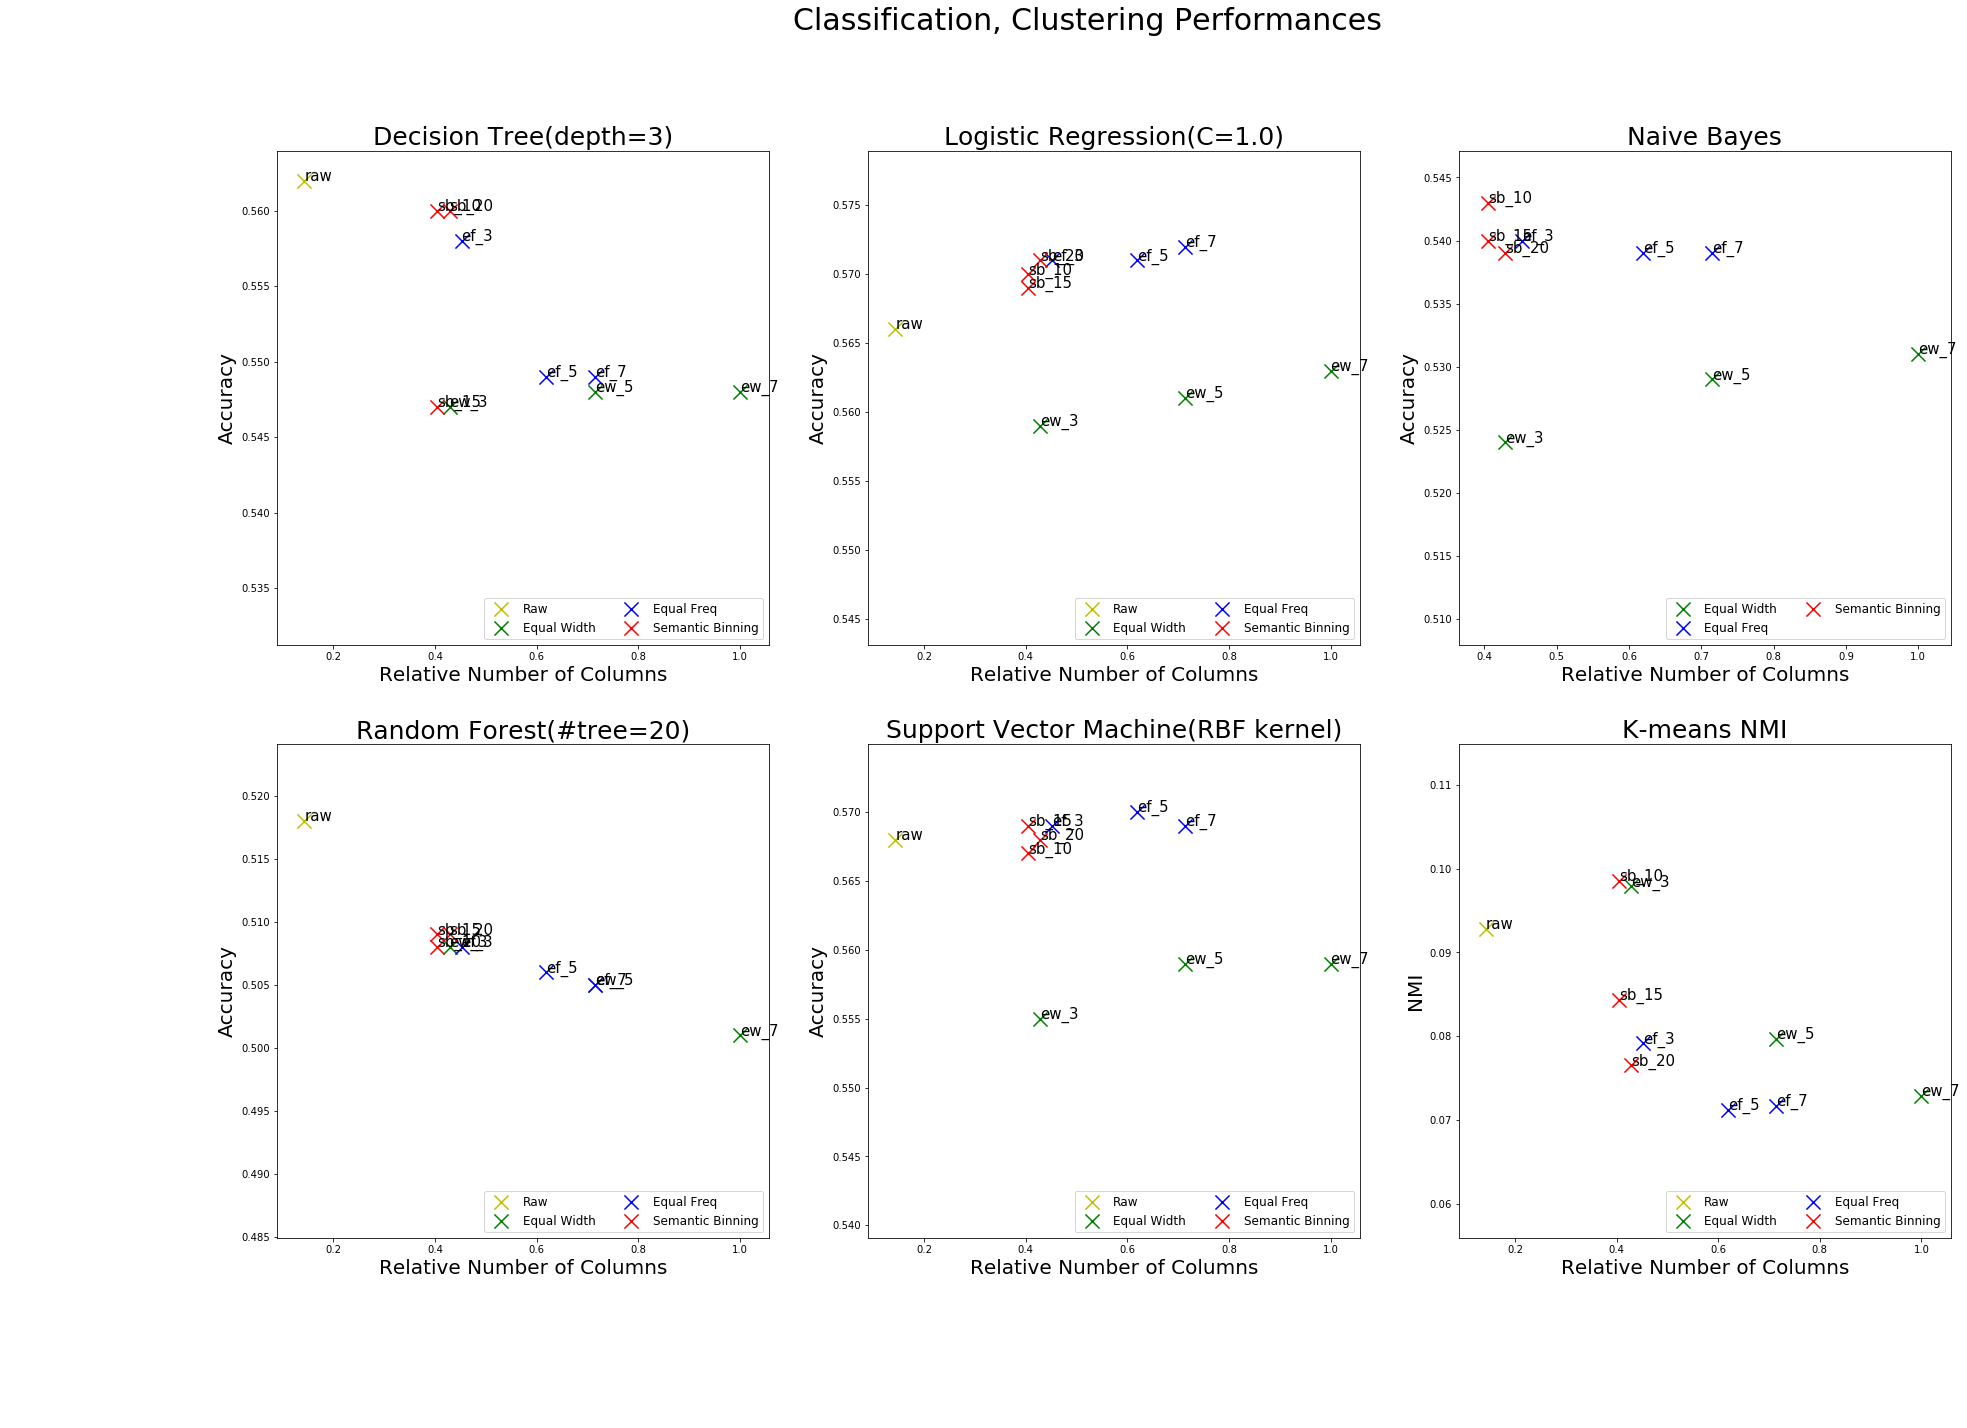

In [8]:
exp.plot_model_comparison_chart(result)

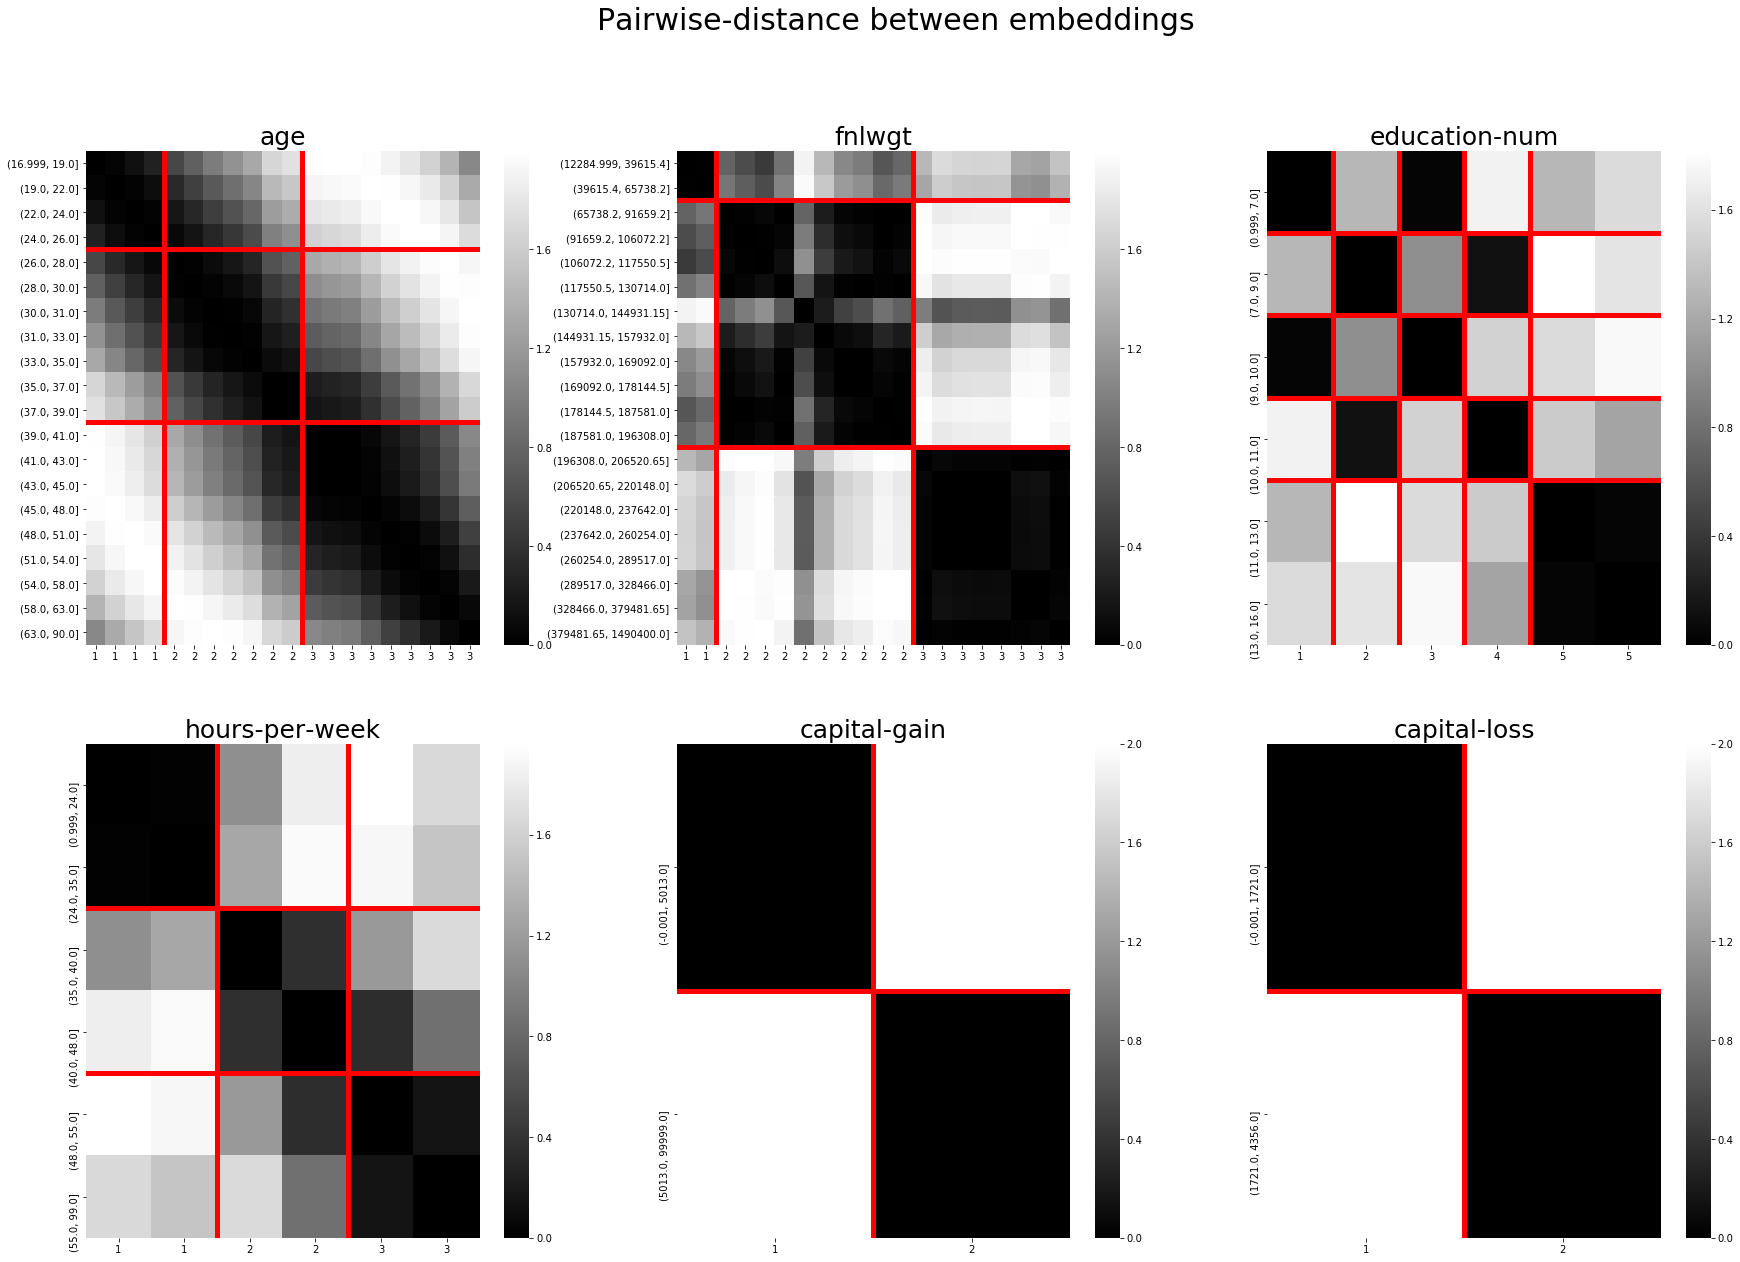

In [9]:
exp.plot_pairwise_distance_matrices()